In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv("titanic.csv")

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.dropna(axis=1, inplace=True)

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

The PMF, PDF, CDF are all functions that are used to calculate the likelihood over something overtime. What is the probability of this overtime. We determine what function to use, if the data is discrete or continious.

PMF gives the probability that a discrete random variable takes on a specific value.
What is the probability that a randomly selected passenger belonged to each class (1st, 2nd, or 3rd)?

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: proportion, dtype: float64


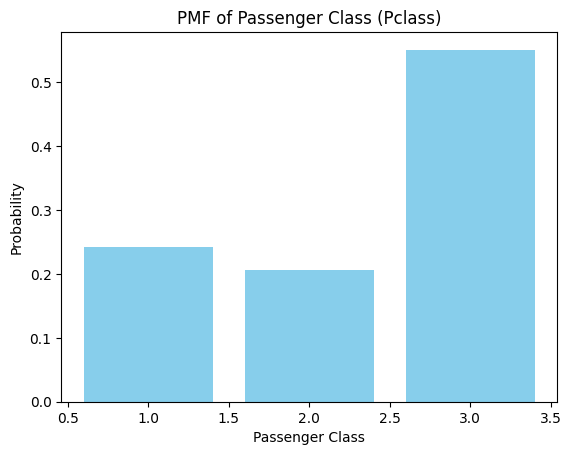

In [12]:
pmf = df['Pclass'].value_counts(normalize=True).sort_index()

print(pmf)

# Visualization
plt.bar(pmf.index, pmf.values, color='skyblue')
plt.title("PMF of Passenger Class (Pclass)")
plt.xlabel("Passenger Class")
plt.ylabel("Probability")
plt.show()

0.242424    About 24.2% of passengers were 1st class.
0.206510	About 20.6% of passengers were in 2nd class.
0.551066	About 55.1% of passengers were in 3rd class.

P(X=xi​)=Total number of observations/Number of times xi​ occurs​

PDF describes the relative likelihood of different values in a continuous variable.

Understand the distribution of ticket fares (Fare) across all passengers.

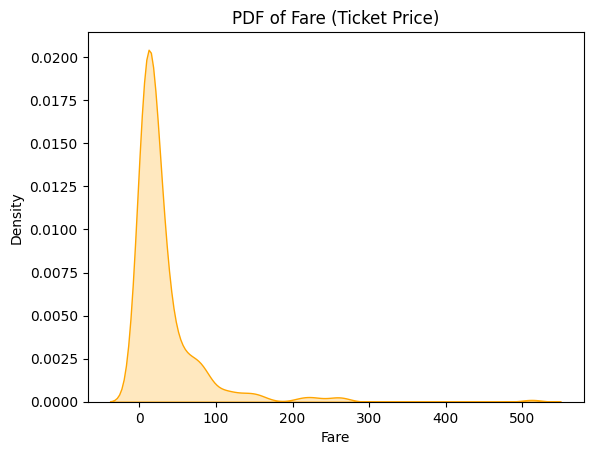

In [13]:
import seaborn as sns
import numpy as np
fare = df['Fare']

# Plot PDF using seaborn's kernel density estimation
sns.kdeplot(fare, fill=True, color='orange')
plt.title("PDF of Fare (Ticket Price)")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()


A high PDF value around 0–90 means most fares fall in this range, and very few passengers paid above 100.

The CDF shows the probability that a random variable is less than or equal to a value.

What’s the probability that a passenger paid less than or equal to $50?

In [ ]:
# 1000 fares

np.arrange (1, 1001)
1, 2, 3, ..., 1000, 1001

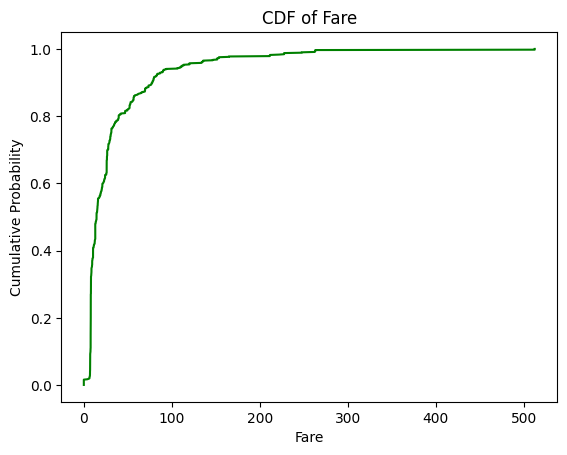

P(Fare ≤ 50) = 0.82


In [14]:

fare_sorted = np.sort(fare)
cdf = np.arange(1, len(fare_sorted)+1) / len(fare_sorted)

plt.plot(fare_sorted, cdf, color='green')
plt.title("CDF of Fare")
plt.xlabel("Fare")
plt.ylabel("Cumulative Probability")
plt.show()

prob_fare_50 = (fare <= 50).mean()
print(f"P(Fare ≤ 50) = {prob_fare_50:.2f}")


The CDF starts at 0 and rises to 1. Each point shows the probability that Fare ≤ x. 
(fare <= 50).mean() gives the proportion of passengers who paid ≤ 50.
If P(Fare ≤ 50) = 0.39, it means 39% of passengers paid ≤ $50.

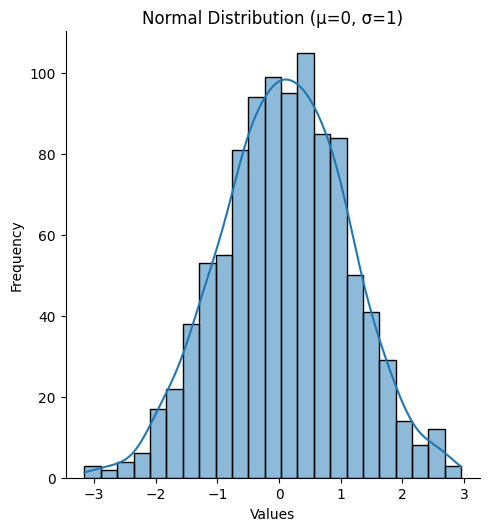

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mu, sigma = 0, 1   
n = 1000

data = np.random.normal(mu, sigma, n)

## Kernel Density Estimate add a smooth curve to the histogram(kde =true)

sns.displot(data, kde=True)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


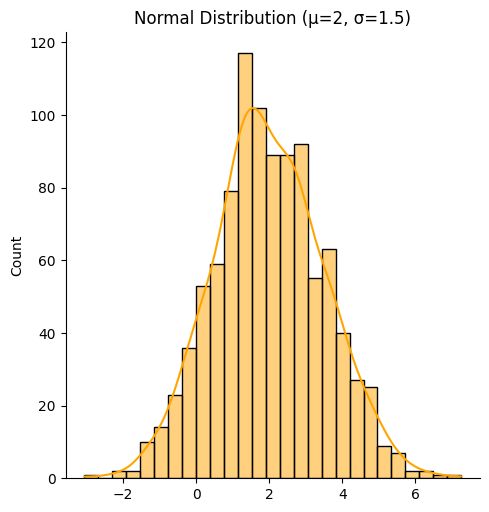

In [ ]:
# Shifted and wider distribution
mu, sigma = 2, 1.5
data = np.random.normal(mu, sigma, 1000)

sns.displot(data, kde=True, color='orange')
plt.title("Normal Distribution (μ=2, σ=1.5)")
plt.show()


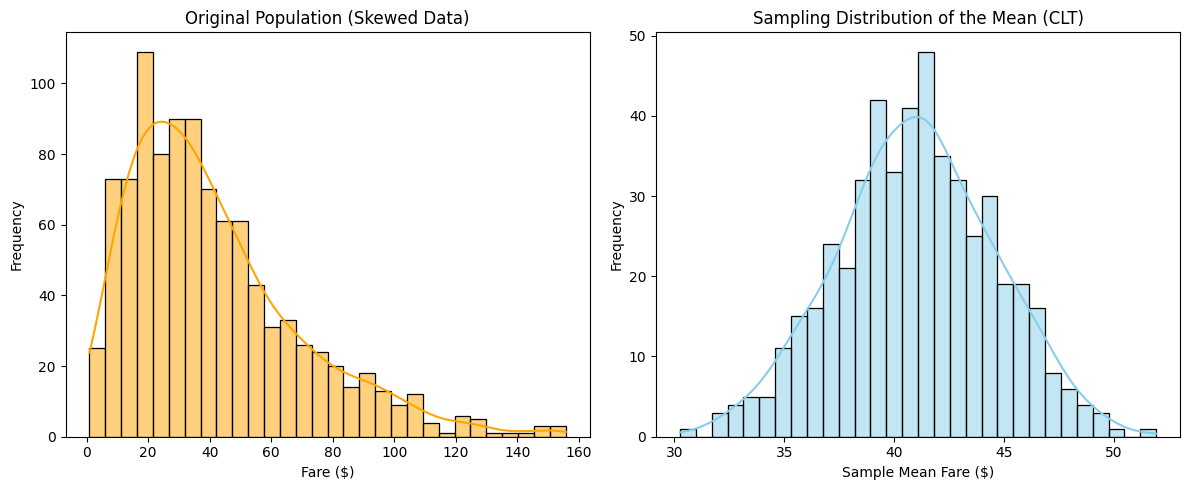

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#skewed population
np.random.seed(42)
population = np.random.gamma(shape=2, scale=20, size=1000)

# samples
sample_means = [np.mean(np.random.choice(population, size=50)) for _ in range(500)]

# Step 3: Plot both side by side
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(population, bins=30, kde=True, color='orange', edgecolor='black')
plt.title("Original Population (Skewed Data)")
plt.xlabel("Fare ($)")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(sample_means, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Sampling Distribution of the Mean (CLT)")
plt.xlabel("Sample Mean Fare ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
